In [1]:
pwd


'/Users/elenatajadura/dev/git/master-data-science/amadeus_challege'

#### Cogemos una muestra del fichero para que sea mas facil hacer los calculos y luego ya trabajaremos sobre el total

In [2]:
! bzcat searches.csv.bz2 | head -10000 > searches.sample.csv


bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = searches.csv.bz2, output file = (stdout)


In [3]:
ls -la


total 2081768
drwxr-xr-x  15 elenatajadura  staff        480  9 dic 13:25 ./
drwxr-xr-x  14 elenatajadura  staff        448  9 dic 13:38 ../
-rw-r--r--@  1 elenatajadura  staff       6148  9 dic 13:05 .DS_Store
drwxr-xr-x  12 elenatajadura  staff        384  9 dic 13:08 .git/
drwxr-xr-x   4 elenatajadura  staff        128  9 dic 12:56 .ipynb_checkpoints/
-rw-r--r--@  1 elenatajadura  staff     173167 30 nov 08:06 10-11_Python_AmadChall_v18.pptx
-rw-r--r--   1 elenatajadura  staff     101011  9 dic 13:17 Untitled.ipynb
-rw-r--r--@  1 elenatajadura  staff  554970628 30 nov 08:52 bookings.csv.bz2
-rw-r--r--   1 elenatajadura  staff    4232732  9 dic 13:12 bookings.sample.csv
-rw-r--r--   1 elenatajadura  staff     535893 30 nov 09:25 bookings.sample.csv.bz2
-rw-r--r--   1 elenatajadura  staff      41637  9 dic 13:25 exercise3.ipynb
-rw-r--r--@  1 elenatajadura  staff  483188920 30 nov 08:51 searches.csv.bz2
-rw-r--r--   1 elenatajadura  staff    1824927  9 dic 13:38 searches.sample.csv
-r

In [4]:
import pandas as pd

In [5]:
searches = pd.read_csv('searches.sample.csv', sep='^')

In [6]:
searches.shape

(9999, 45)

In [7]:
searches.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [8]:
#Mostramos todas las columnas
pd.set_option('display.max_columns', None)

In [9]:
searches.sample(5)

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
8047,2013-01-09,11:20:10,MTP,236cbf458f79dbb9d5e9c9430438c3db,US,KBP,ATL,1,2,KBP,ATL,2013-04-01,NaN,NaN,ATL,KBP,2013-06-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,HPN
3117,2013-01-04,15:14:04,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,LUX,MUC,1,2,LUX,MUC,2013-02-02,NaN,NaN,MUC,LUX,2013-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
987,2013-01-01,11:25:06,MPT,c8daef4f8bf73a61aa2c928705f7b82d,ES,HAM,RAK,0,1,HAM,RAK,2013-03-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,MAD
9534,2013-01-10,07:40:26,FQD,1a4bead78c94611be73d998457e6785b,SK,BTS,IEV,1,2,BTS,IEV,2013-01-10,NaN,NaN,IEV,BTS,2013-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,07e9750827dc95313650f049e45c6ac7,BTS
3274,2013-01-04,01:03:45,FXR,ac5c1bccc3d30d7f8f1c2e720d134d6b,US,YVR,SFO,0,1,YVR,SFO,2013-01-09,FK,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,078ac21f9ea3c894a682d25aef376c70,OAK


In [10]:
searches.dtypes

Date                 object
Time                 object
TxnCode              object
OfficeID             object
Country              object
Origin               object
Destination          object
RoundTrip             int64
NbSegments            int64
Seg1Departure        object
Seg1Arrival          object
Seg1Date             object
Seg1Carrier          object
Seg1BookingCode      object
Seg2Departure        object
Seg2Arrival          object
Seg2Date             object
Seg2Carrier          object
Seg2BookingCode      object
Seg3Departure        object
Seg3Arrival          object
Seg3Date             object
Seg3Carrier          object
Seg3BookingCode      object
Seg4Departure        object
Seg4Arrival          object
Seg4Date             object
Seg4Carrier          object
Seg4BookingCode      object
Seg5Departure        object
Seg5Arrival          object
Seg5Date             object
Seg5Carrier          object
Seg5BookingCode      object
Seg6Departure        object
Seg6Arrival         

In [11]:
searches.describe()

,RoundTrip,NbSegments,IsPublishedForNeg,IsFromInternet,IsFromVista
count,9999.000000,9999.000000,9999.0,9999.0,9999.0
mean,0.700670,1.833583,0.0,0.0,0.0
std,0.457987,0.731857,0.0,0.0,0.0
min,0.000000,1.000000,0.0,0.0,0.0
25%,0.000000,1.000000,0.0,0.0,0.0
50%,1.000000,2.000000,0.0,0.0,0.0
75%,1.000000,2.000000,0.0,0.0,0.0
max,1.000000,9.000000,0.0,0.0,0.0


In [12]:
#para ver si tenemos nulls
searches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 45 columns):
Date                 9999 non-null object
Time                 9999 non-null object
TxnCode              9999 non-null object
OfficeID             9999 non-null object
Country              9999 non-null object
Origin               9999 non-null object
Destination          9999 non-null object
RoundTrip            9999 non-null int64
NbSegments           9999 non-null int64
Seg1Departure        9999 non-null object
Seg1Arrival          9999 non-null object
Seg1Date             9972 non-null object
Seg1Carrier          4047 non-null object
Seg1BookingCode      1143 non-null object
Seg2Departure        7195 non-null object
Seg2Arrival          7195 non-null object
Seg2Date             7160 non-null object
Seg2Carrier          2870 non-null object
Seg2BookingCode      998 non-null object
Seg3Departure        534 non-null object
Seg3Arrival          534 non-null object
Seg3Date        

In [13]:
searches.columns

Index(['Date', 'Time', 'TxnCode', 'OfficeID', 'Country', 'Origin',
       'Destination', 'RoundTrip', 'NbSegments', 'Seg1Departure',
       'Seg1Arrival', 'Seg1Date', 'Seg1Carrier', 'Seg1BookingCode',
       'Seg2Departure', 'Seg2Arrival', 'Seg2Date', 'Seg2Carrier',
       'Seg2BookingCode', 'Seg3Departure', 'Seg3Arrival', 'Seg3Date',
       'Seg3Carrier', 'Seg3BookingCode', 'Seg4Departure', 'Seg4Arrival',
       'Seg4Date', 'Seg4Carrier', 'Seg4BookingCode', 'Seg5Departure',
       'Seg5Arrival', 'Seg5Date', 'Seg5Carrier', 'Seg5BookingCode',
       'Seg6Departure', 'Seg6Arrival', 'Seg6Date', 'Seg6Carrier',
       'Seg6BookingCode', 'From', 'IsPublishedForNeg', 'IsFromInternet',
       'IsFromVista', 'TerminalID', 'InternetOffice'],
      dtype='object')

In [14]:
list(searches.columns)

['Date',
 'Time',
 'TxnCode',
 'OfficeID',
 'Country',
 'Origin',
 'Destination',
 'RoundTrip',
 'NbSegments',
 'Seg1Departure',
 'Seg1Arrival',
 'Seg1Date',
 'Seg1Carrier',
 'Seg1BookingCode',
 'Seg2Departure',
 'Seg2Arrival',
 'Seg2Date',
 'Seg2Carrier',
 'Seg2BookingCode',
 'Seg3Departure',
 'Seg3Arrival',
 'Seg3Date',
 'Seg3Carrier',
 'Seg3BookingCode',
 'Seg4Departure',
 'Seg4Arrival',
 'Seg4Date',
 'Seg4Carrier',
 'Seg4BookingCode',
 'Seg5Departure',
 'Seg5Arrival',
 'Seg5Date',
 'Seg5Carrier',
 'Seg5BookingCode',
 'Seg6Departure',
 'Seg6Arrival',
 'Seg6Date',
 'Seg6Carrier',
 'Seg6BookingCode',
 'From',
 'IsPublishedForNeg',
 'IsFromInternet',
 'IsFromVista',
 'TerminalID',
 'InternetOffice']

## 2) Select the columns of interest

In [32]:
searches_iter = pd.read_csv('searches.csv.bz2', sep='^', usecols = ['Destination', 'Date'], chunksize=1000000)
searches=pd.DataFrame()
for i, search in enumerate(searches_iter):
    print(i)
    search=search.dropna()
    searches=searches.append(search)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [33]:
searches.sample(5)

,Date,Destination
7789131,2013-09-08,KIN
12362307,2013-06-06,ACK
18105477,2013-06-05,DEL
16133157,2013-12-03,MGA
14364169,2013-01-04,RGN


In [34]:
searches['Date2']=pd.to_datetime(searches['Date'], format='%Y/%m/%d')

In [35]:
searches.sample(5)

,Date,Destination,Date2
8643182,2013-01-28,ACE,2013-01-28
2097638,2013-10-30,LON,2013-10-30
1035474,2013-11-14,BCN,2013-11-14
6137365,2013-02-04,DFW,2013-02-04
17428596,2013-07-16,LON,2013-07-16


In [36]:
searches['Year']=pd.DatetimeIndex(searches['Date2']).year

In [37]:
searches['Month']=pd.DatetimeIndex(searches['Date2']).month

In [38]:
searches.sample(5)

,Date,Destination,Date2,Year,Month
20062368,2013-11-14,USK,2013-11-14,2013,11
8526565,2013-09-27,DJB,2013-09-27,2013,9
19085696,2013-02-28,BAH,2013-02-28,2013,2
13044676,2013-05-01,TPA,2013-05-01,2013,5
15173861,2013-04-06,BER,2013-04-06,2013,4


In [39]:
years=searches.groupby('Year').sum()
years

,Month
Year,
2013,130858977


In [40]:
malaga=searches[searches['Destination']== 'AGP']

In [42]:
malaga.sample(5)

,Date,Destination,Date2,Year,Month
11503487,2013-01-16,AGP,2013-01-16,2013,1
1064837,2013-12-13,AGP,2013-12-13,2013,12
5755589,2013-01-12,AGP,2013-01-12,2013,1
9565254,2013-08-20,AGP,2013-08-20,2013,8
8468618,2013-07-31,AGP,2013-07-31,2013,7


In [43]:
madrid=searches[searches['Destination']== 'MAD']

In [44]:
barcelona=searches[searches['Destination']== 'BCN']

In [46]:
malaga_monthly=malaga.groupby('Month').sum()
malaga_monthly

,Year
Month,
1,19391229
2,16866927
3,21456567
4,16637445
5,21800790
6,15948999
7,17899596
8,15834258
9,16407963


In [47]:
madrid_monthly=madrid.groupby('Month').sum()
madrid_monthly

,Year
Month,
1,48831354
2,45896400
3,49682853
4,50830263
5,53010342
6,45896400
7,46240623
8,43945803
9,42568911


In [48]:
barcelona_monthly=barcelona.groupby('Month').sum()
barcelona_monthly

,Year
Month,
1,59321097
2,57026277
3,61501176
4,62878068
5,57829464
6,53354565
7,58862133
8,54501975
9,47158551


In [49]:
import matplotlib.pyplot as plt

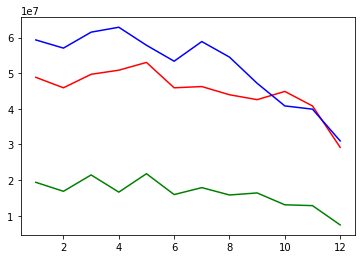

In [54]:
plt.plot(malaga_monthly,'g')
plt.plot(madrid_monthly, 'r')
plt.plot(barcelona_monthly, 'b')